### Importing Libraries

In [1292]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder

### Importing Dataset

In [1293]:
df = pd.read_csv('/home/gpu-linux/Desktop/iftkr/adult_income.csv')
df = pd.DataFrame(df,index=None)
df

,Age,Workclass,fnlwgt,Education,Education_num,Marital_status,Occupation,relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [1294]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 32561
Number of columns: 15


In [1295]:
# Data info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education_num   32561 non-null  int64 
 5   Marital_status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital_gain    32561 non-null  int64 
 11  Capital_loss    32561 non-null  int64 
 12  Hours_per_week  32561 non-null  int64 
 13  Native_country  32561 non-null  object
 14  Income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [1296]:
# Handling missing values from Dataset

df.isnull().sum()

Age               0
Workclass         0
fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [1297]:
# Removing duplicated entries

df.dropna(inplace=True)

### Identifying and Treating Outliers

In [1298]:
# Statistical summary of numerical features

df.select_dtypes(include=['int64','float64']).describe()

,Age,fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


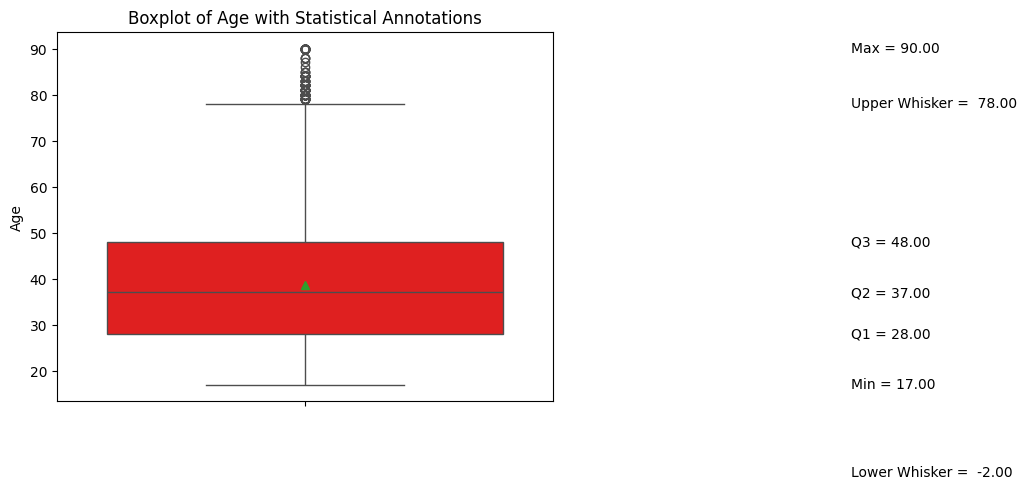

In [1299]:
sns.boxplot(y=df['Age'], color='r', showmeans=True)
Q1 = np.percentile(df['Age'], 25)
Q2 = np.percentile(df['Age'], 50)
Q3 = np.percentile(df['Age'], 75)
minimum = df['Age'].min()
maximum = df['Age'].max()

upper_whisker = Q3 + 1.5 * (Q3 - Q1)
lower_whisker = Q1 - 1.5 * (Q3 - Q1)

outliers = boxplot_stats(df['Age'])[0]['fliers']

plt.text(1.1, Q1, f"Q1 = {Q1:.2f}", va="center")
plt.text(1.1, Q2, f"Q2 = {Q2:.2f}", va="center")
plt.text(1.1, Q3, f"Q3 = {Q3:.2f}", va="center")
plt.text(1.1, upper_whisker, f"Upper Whisker =  {upper_whisker:.2f}", va="center")
plt.text(1.1, lower_whisker, f"Lower Whisker =  {lower_whisker:.2f}",va="center")
plt.text(1.1, minimum, f"Min = {minimum:.2f}", va="center")
plt.text(1.1, maximum, f"Max = {maximum:.2f}", va="center")
plt.title("Boxplot of Age with Statistical Annotations")
plt.show()


In [1300]:
print("Number of people above age 78:",len(df[df['Age']>upper_whisker]['Age']))

Number of people above age 78: 143


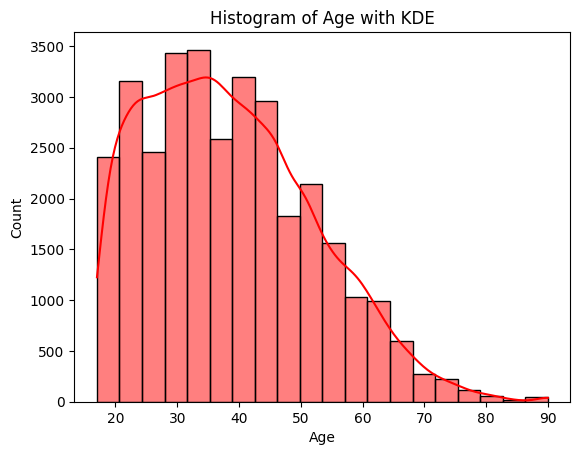

In [1301]:
sns.histplot(df['Age'], kde=True, color='r',bins=20)
plt.title("Histogram of Age with KDE")
plt.show()

* The datapoints above 78 is still justifiable as the max value for age is 90 and falls under realistic  human limits

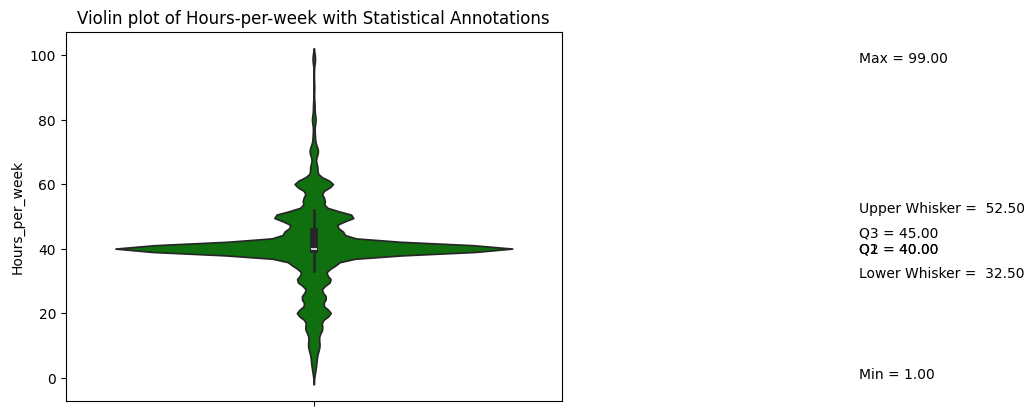

In [1302]:
sns.violinplot(y=df['Hours_per_week'], color='g')
Q1 = np.percentile(df['Hours_per_week'], 25)
Q2 = np.percentile(df['Hours_per_week'], 50)
Q3 = np.percentile(df['Hours_per_week'], 75)
minimum = df['Hours_per_week'].min()
maximum = df['Hours_per_week'].max()

upper_whisker = Q3 + 1.5 * (Q3 - Q1)
lower_whisker = Q1 - 1.5 * (Q3 - Q1)
plt.text(1.1, Q1, f"Q1 = {Q1:.2f}", va="center")
plt.text(1.1, Q2, f"Q2 = {Q2:.2f}", va="center")
plt.text(1.1, Q3, f"Q3 = {Q3:.2f}", va="center")
plt.text(1.1, upper_whisker, f"Upper Whisker =  {upper_whisker:.2f}", va="center")
plt.text(1.1, lower_whisker, f"Lower Whisker =  {lower_whisker:.2f}", va="center")
plt.text(1.1, minimum, f"Min = {minimum:.2f}", va="center")
plt.text(1.1, maximum, f"Max = {maximum:.2f}", va="center")
plt.title("Violin plot of Hours-per-week with Statistical Annotations")
plt.show()


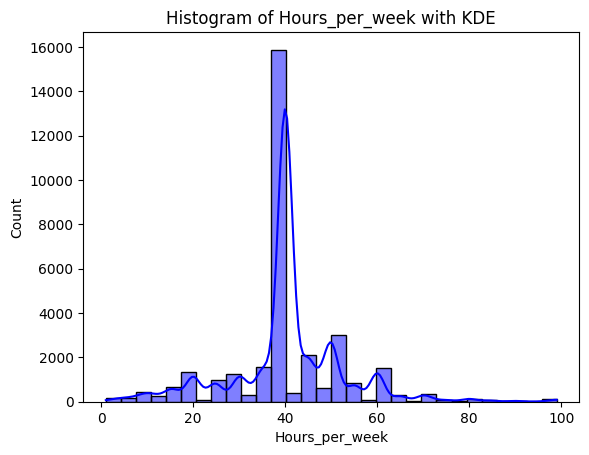

In [1303]:
sns.histplot(df['Hours_per_week'], kde=True, color='b',bins=30)
plt.title("Histogram of Hours_per_week with KDE")
plt.show()

* Maximum number of hours worked per week is 99

* Minimum number of hours worked per week is 1

* The violin plot shows third quartile(Q3) as 52.50 ~ 53 hours per week.
  - if we consider 6 working days then each day will have approximatly 9 working hours.
  - if we consider 5 working days then each day will have approximatly 11 working hours.

* Let us consider they are 6 working days in a week and daily 12 hours of working hours then total to 72 hours per week which is extreme and exhausting




In [1304]:
print("Number of individuals who work more than 72 hours per week :",len(df[df['Hours_per_week']>72]))

Number of individuals who work more than 72 hours per week : 427


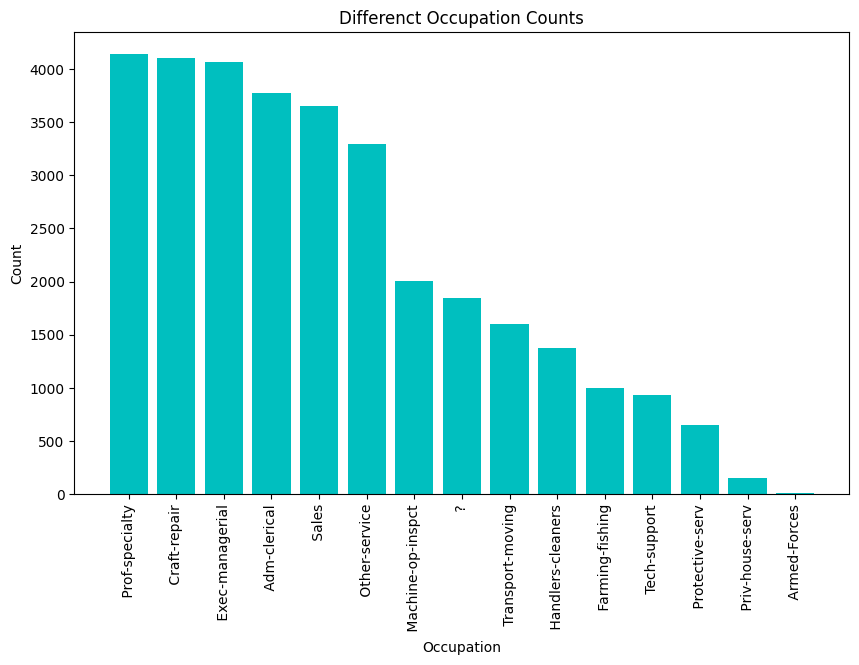

In [1305]:
plt.figure(figsize=(10,6))
plt.bar(df['Occupation'].value_counts().index, df['Occupation'].value_counts().values, color='c')
plt.xticks(rotation=90)
plt.title("Differenct Occupation Counts")
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.show()

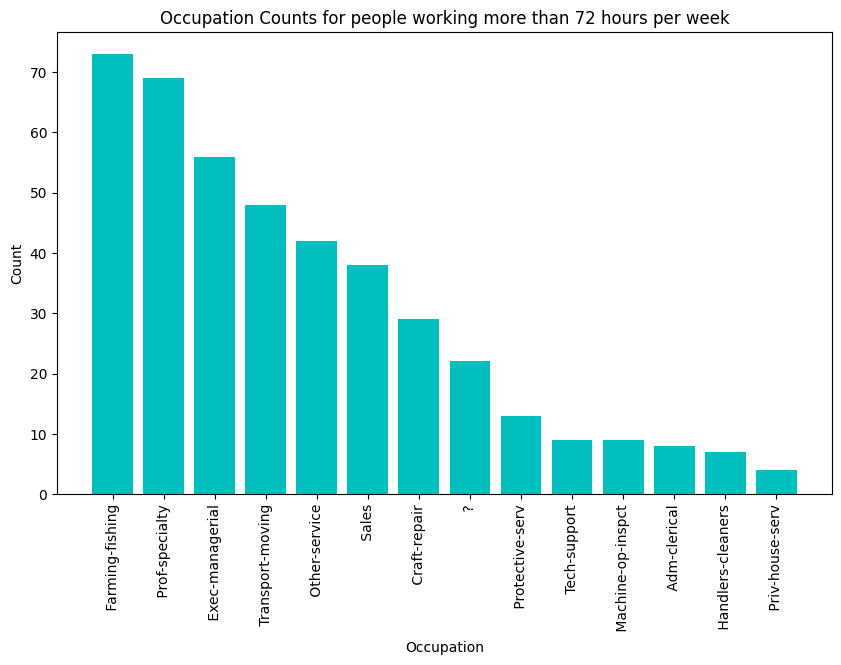

In [1306]:
df_72 = df[df['Hours_per_week']>72]
plt.figure(figsize=(10,6))
plt.bar(df_72['Occupation'].value_counts().index, df_72['Occupation'].value_counts().values, color='c')
plt.xticks(rotation=90)
plt.title("Occupation Counts for people working more than 72 hours per week")
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.show()

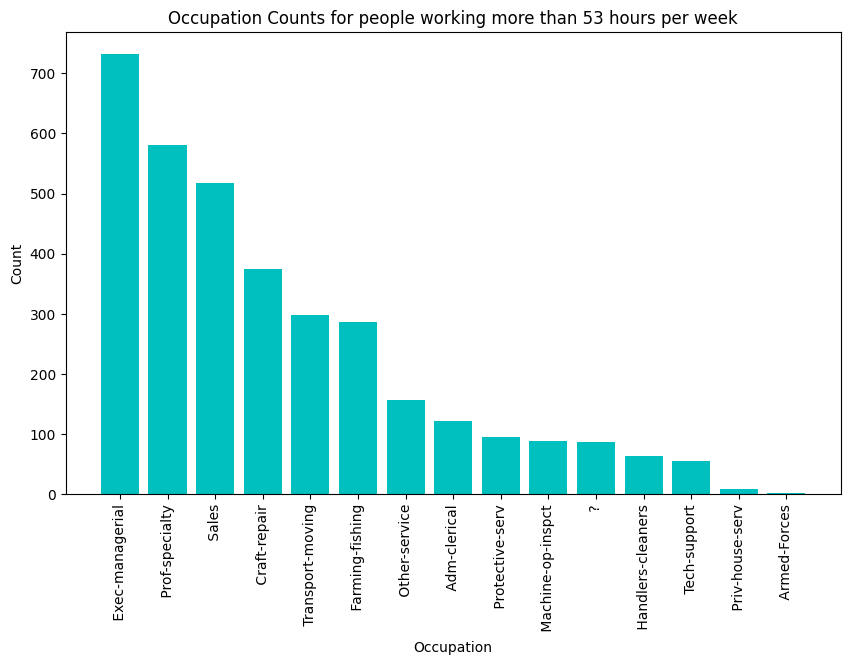

In [1307]:
df_53 = df[df['Hours_per_week']>53]
plt.figure(figsize=(10,6))
plt.bar(df_53['Occupation'].value_counts().index, df_53['Occupation'].value_counts().values, color='c')
plt.xticks(rotation=90)
plt.title("Occupation Counts for people working more than 53 hours per week")
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.show()

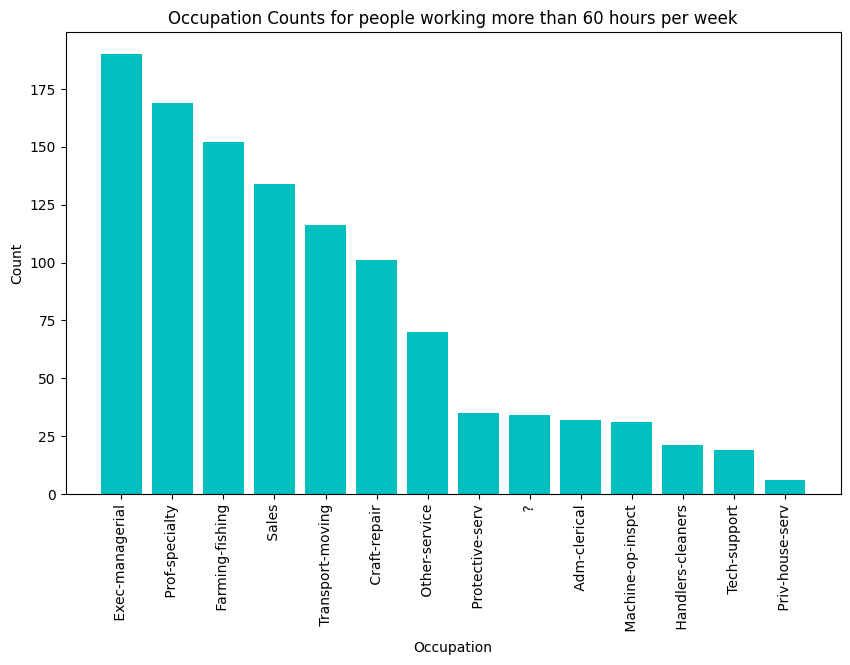

In [1308]:
df_60 = df[df['Hours_per_week']>60]
plt.figure(figsize=(10,6))
plt.bar(df_60['Occupation'].value_counts().index, df_60['Occupation'].value_counts().values, color='c')
plt.xticks(rotation=90)
plt.title("Occupation Counts for people working more than 60 hours per week")
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.show()

In [1309]:
print("Total number of population:",df.shape[0])
print("Number of people working more than 53 hours per week:",len(df_53),", i.e ",(len(df_53)/df.shape[0])*100,"% of total population")
print("Number of people working more than 60 hours per week:",len(df_60),", i.e ",(len(df_60)/df.shape[0])*100,"% of total population")
print("Number of people working more than 72 hours per week:",len(df_72),", i.e ",(len(df_72)/df.shape[0])*100,"% of total population")

Total number of population: 32561
Number of people working more than 53 hours per week: 3467 , i.e  10.647707379994472 % of total population
Number of people working more than 60 hours per week: 1110 , i.e  3.40898621049722 % of total population
Number of people working more than 72 hours per week: 427 , i.e  1.3113847854795615 % of total population


In [1310]:
df = df[df['Hours_per_week']<=60]

* Removing the individuals who works more than 60 hours per week because its a small population(3.4%) of people compare to the total population of the data and removing such data will help us concenrate on majority population with clean insights. 

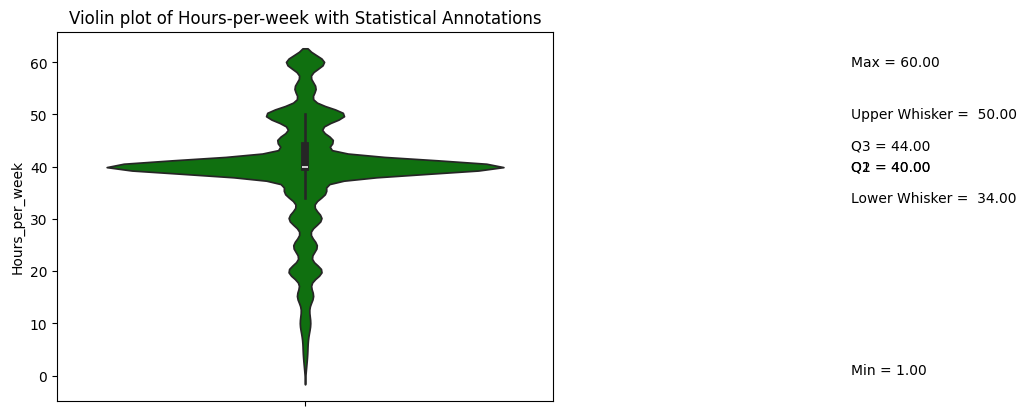

In [1311]:
sns.violinplot(y=df['Hours_per_week'], color='g')
Q1 = np.percentile(df['Hours_per_week'], 25)
Q2 = np.percentile(df['Hours_per_week'], 50)
Q3 = np.percentile(df['Hours_per_week'], 75)
minimum = df['Hours_per_week'].min()
maximum = df['Hours_per_week'].max()

upper_whisker = Q3 + 1.5 * (Q3 - Q1)
lower_whisker = Q1 - 1.5 * (Q3 - Q1)
plt.text(1.1, Q1, f"Q1 = {Q1:.2f}", va="center")
plt.text(1.1, Q2, f"Q2 = {Q2:.2f}", va="center")
plt.text(1.1, Q3, f"Q3 = {Q3:.2f}", va="center")
plt.text(1.1, upper_whisker, f"Upper Whisker =  {upper_whisker:.2f}", va="center")
plt.text(1.1, lower_whisker, f"Lower Whisker =  {lower_whisker:.2f}", va="center")
plt.text(1.1, minimum, f"Min = {minimum:.2f}", va="center")
plt.text(1.1, maximum, f"Max = {maximum:.2f}", va="center")
plt.title("Violin plot of Hours-per-week with Statistical Annotations")
plt.show()


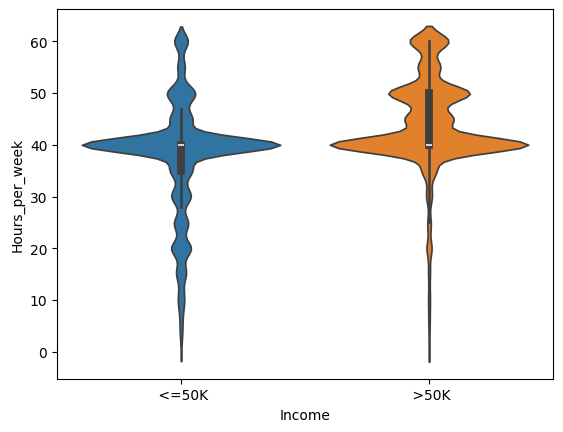

In [1312]:
sns.violinplot(data=df,x = 'Income',y='Hours_per_week',hue='Income')
plt.show()

In [1313]:
df_less_hrpwk = df[df['Hours_per_week']<9][['Hours_per_week','Income']]
df_less_hrpwk['Income'].value_counts()

Income
<=50K    396
>50K      44
Name: count, dtype: int64

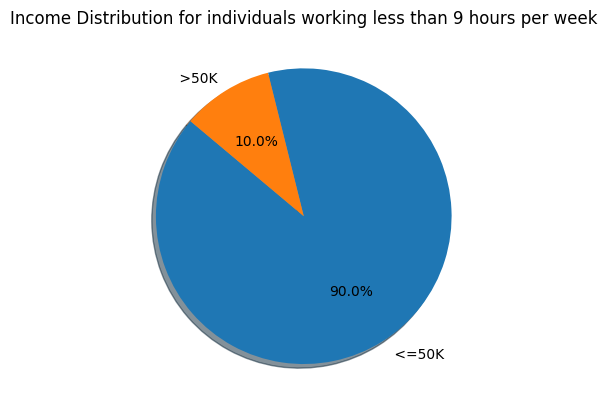

In [1314]:
plt.pie(df_less_hrpwk['Income'].value_counts(),labels=df_less_hrpwk['Income'].value_counts().index,autopct='%1.1f%%',shadow=True,startangle=140)
plt.title("Income Distribution for individuals working less than 9 hours per week")
plt.show()

* No need to remove people whose hours_per_week is in single digit as there income shows less than $50k which is quite correct as "Less hours of work" = "Less Income"

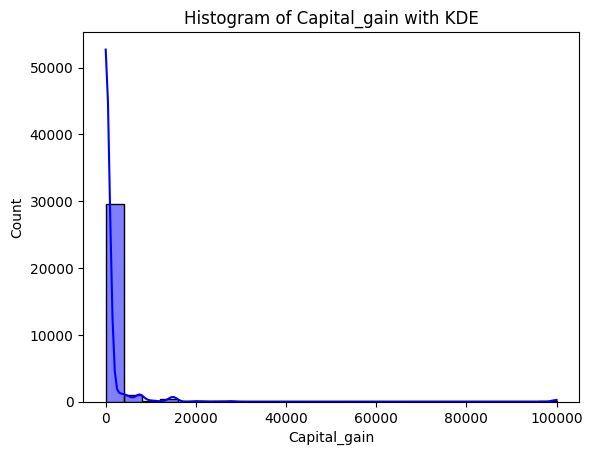

In [1315]:
sns.histplot(df['Capital_gain'], kde=True, color='b',bins=25)
plt.title("Histogram of Capital_gain with KDE")
plt.show()

/tmp/ipykernel_4883/2830322025.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['capgain_log'] = np.log1p(df['Capital_gain'])


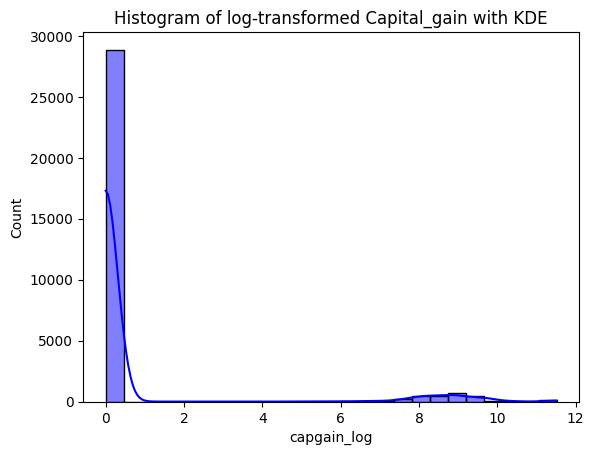

In [1316]:
df['capgain_log'] = np.log1p(df['Capital_gain'])
sns.histplot(df['capgain_log'], kde=True, color='b',bins=25)
plt.title("Histogram of log-transformed Capital_gain with KDE")
plt.show()

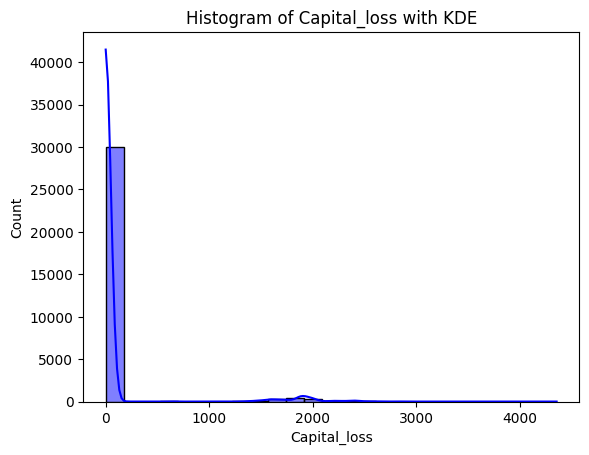

In [1317]:
sns.histplot(df['Capital_loss'], kde=True, color='b',bins=25)
plt.title("Histogram of Capital_loss with KDE")
plt.show()

/tmp/ipykernel_4883/872690055.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['caploss_log'] = np.log1p(df['Capital_loss'])


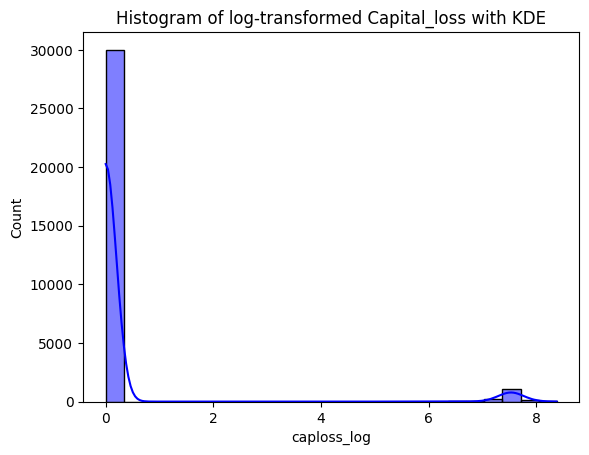

In [1318]:
df['caploss_log'] = np.log1p(df['Capital_loss'])
sns.histplot(df['caploss_log'], kde=True, color='b',bins=25)
plt.title("Histogram of log-transformed Capital_loss with KDE")
plt.show()

### Normalize data

In [1319]:
df.drop(columns=['caploss_log','capgain_log'],inplace=True)

/tmp/ipykernel_4883/507090104.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['caploss_log','capgain_log'],inplace=True)


In [1320]:
#Normalizing numerical columns (Scaling and Standardizing)

# Columns with numerical/float data types
df[df.select_dtypes(include=['int64', 'float64','int32','float32']).columns]

,Age,fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
32556,27,257302,12,0,0,38
32557,40,154374,9,0,0,40
32558,58,151910,9,0,0,40
32559,22,201490,9,0,0,20


In [1321]:
# Removing irrelevant or redundant features.

df.drop(columns=['fnlwgt'],inplace=True)
df.head(5)

/tmp/ipykernel_4883/1125658726.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['fnlwgt'],inplace=True)


,Age,Workclass,Education,Education_num,Marital_status,Occupation,relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [1322]:
df[df.select_dtypes(include=['int64', 'float64','int32','float32']).columns].head(5)

,Age,Education_num,Capital_gain,Capital_loss,Hours_per_week
0,39,13,2174,0,40
1,50,13,0,0,13
2,38,9,0,0,40
3,53,7,0,0,40
4,28,13,0,0,40


In [1323]:
df.describe()

,Age,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,31451.000000,31451.000000,31451.000000,31451.000000,31451.000000
mean,38.516391,10.065372,1009.011319,85.736988,39.235605
std,13.703915,2.560179,6954.027797,399.033836,10.570785
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,27.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,44.000000
max,90.000000,16.000000,99999.000000,4356.000000,60.000000


In [1324]:
scaler = StandardScaler()
scaled_values = scaler.fit_transform(df[['Age','Education_num','Capital_gain','Capital_loss','Hours_per_week']])

In [1325]:
scaled_values

array([[ 0.03529044,  1.14627718,  0.16752985, -0.21486486,  0.07231322],
       [ 0.83799355,  1.14627718, -0.1450997 , -0.21486486, -2.48193688],
       [-0.03768257, -0.41613822, -0.1450997 , -0.21486486,  0.07231322],
       ...,
       [ 1.42177763, -0.41613822, -0.1450997 , -0.21486486,  0.07231322],
       [-1.20525074, -0.41613822, -0.1450997 , -0.21486486, -1.81972389],
       [ 0.98393957, -0.41613822,  2.01540918, -0.21486486,  0.07231322]],
      shape=(31451, 5))

### Converting categorical features into numerical formats

In [1326]:
df.shape

(31451, 14)

In [1327]:
# Drop or impute missing values first (?)
df = df[df != ' ?'].dropna() 

In [1328]:
df[df.select_dtypes(include=['object']).columns]

,Workclass,Education,Marital_status,Occupation,relationship,Race,Sex,Native_country,Income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [1329]:
df['Workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [1330]:
df.shape

(29110, 14)

In [1331]:
for i in df:
    if df.dtypes[i] == 'object':
        print("Unquie entries in ",i,":\n",df[i].unique(),"\n ======================= \n")

Unquie entries in  Workclass :
 [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay'] 

Unquie entries in  Education :
 [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Assoc-acdm'
 ' 7th-8th' ' Doctorate' ' Some-college' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th'] 

Unquie entries in  Marital_status :
 [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed'] 

Unquie entries in  Occupation :
 [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Transport-moving' ' Farming-fishing'
 ' Machine-op-inspct' ' Tech-support' ' Craft-repair' ' Protective-serv'
 ' Armed-Forces' ' Priv-house-serv'] 

Unquie entries in  relationship :
 [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative'] 

Unquie entries in  Race :
 [' White' ' Black' ' Asian-Pac-Islander' ' 

In [1332]:
edu_order = ['Preschool','1st-4th','5th-6th','7th-8th','9th','10th',
             '11th','12th','HS-grad','Some-college','Assoc-voc','Assoc-acdm',
             'Bachelors','Masters','Prof-school','Doctorate']
df['Education'] = df['Education'].str.strip()
df['Education'] = pd.Categorical(df['Education'], categories=edu_order, ordered=True)
df['Education_code'] = df['Education'].cat.codes


In [1333]:
df['Education_code'].value_counts()

Education_code
8     9509
9     6471
12    4876
13    1545
10    1271
6     1024
11     980
5      792
3      531
14     486
4      445
7      371
15     340
2      282
1      144
0       43
Name: count, dtype: int64

In [1334]:
df['Education'].value_counts()

Education
HS-grad         9509
Some-college    6471
Bachelors       4876
Masters         1545
Assoc-voc       1271
11th            1024
Assoc-acdm       980
10th             792
7th-8th          531
Prof-school      486
9th              445
12th             371
Doctorate        340
5th-6th          282
1st-4th          144
Preschool         43
Name: count, dtype: int64

In [1335]:
df

,Age,Workclass,Education,Education_num,Marital_status,Occupation,relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,Education_code
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,12
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,12
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,8
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,6
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,11
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,8
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,8
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,8


In [ ]:
ohe = OneHotEncoder()
workclass_encoded = ohe.fit_transform(df[['Workclass']])
encoded_df = pd.DataFrame(workclass_encoded.toarray(), columns=ohe.get_feature_names_out(['Workclass']))
df_encoded = pd.concat([df, encoded_df],axis=1)
df_encoded.drop(columns=['Workclass'],axis=1,inplace=True)
df_encoded.iloc[:,14:]


,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,Workclass_ Without-pay
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
29097,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29098,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29101,0.0,0.0,1.0,0.0,0.0,0.0,0.0
29104,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [1283]:
df['Marital_status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [1284]:
ohe = OneHotEncoder()
occupation_encoded = ohe.fit_transform(df[['Occupation']])
encoded_df = pd.DataFrame(occupation_encoded.toarray(), columns=ohe.get_feature_names_out(['Occupation']))
df_encoded = pd.concat([df_encoded, encoded_df],axis=1)
df_encoded.drop(columns=['Occupation'],axis=1,inplace=True)
df_encoded.iloc[:,14:]

,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,Workclass_ Without-pay,Occupation_ Adm-clerical,Occupation_ Armed-Forces,Occupation_ Craft-repair,Occupation_ Exec-managerial,Occupation_ Farming-fishing,Occupation_ Handlers-cleaners,Occupation_ Machine-op-inspct,Occupation_ Other-service,Occupation_ Priv-house-serv,Occupation_ Prof-specialty,Occupation_ Protective-serv,Occupation_ Sales,Occupation_ Tech-support,Occupation_ Transport-moving
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29097,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
29098,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29101,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29104,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [1285]:
ohe = OneHotEncoder()
marital_encoded = ohe.fit_transform(df[['Marital_status']])
encoded_df = pd.DataFrame(marital_encoded.toarray(), columns=ohe.get_feature_names_out(['Marital_status']))
df_encoded = pd.concat([df_encoded, encoded_df],axis=1)
df_encoded.drop(columns=['Marital_status'],axis=1,inplace=True)
df_encoded.iloc[:,14:]

,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,Workclass_ Without-pay,Occupation_ Adm-clerical,Occupation_ Armed-Forces,Occupation_ Craft-repair,Occupation_ Exec-managerial,Occupation_ Farming-fishing,...,Occupation_ Sales,Occupation_ Tech-support,Occupation_ Transport-moving,Marital_status_ Divorced,Marital_status_ Married-AF-spouse,Marital_status_ Married-civ-spouse,Marital_status_ Married-spouse-absent,Marital_status_ Never-married,Marital_status_ Separated,Marital_status_ Widowed
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29097,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29098,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
29101,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
29104,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [1286]:
ohe = OneHotEncoder()
relation_encoded = ohe.fit_transform(df[['relationship']])
encoded_df = pd.DataFrame(relation_encoded.toarray(), columns=ohe.get_feature_names_out(['relationship']))
df_encoded = pd.concat([df_encoded, encoded_df],axis=1)
df_encoded.drop(columns=['relationship'],axis=1,inplace=True)
df_encoded.iloc[:,14:]

,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,Workclass_ Without-pay,Occupation_ Adm-clerical,Occupation_ Armed-Forces,Occupation_ Craft-repair,Occupation_ Exec-managerial,Occupation_ Farming-fishing,Occupation_ Handlers-cleaners,...,Marital_status_ Married-spouse-absent,Marital_status_ Never-married,Marital_status_ Separated,Marital_status_ Widowed,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29097,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
29098,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
29101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
29104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [1287]:
ohe = OneHotEncoder()
race_encoded = ohe.fit_transform(df[['Race']])
encoded_df = pd.DataFrame(race_encoded.toarray(), columns=ohe.get_feature_names_out(['Race']))
df_encoded = pd.concat([df_encoded, encoded_df],axis=1)
df_encoded.drop(columns=['Race'],axis=1,inplace=True)
df_encoded.iloc[:,14:]

,Workclass_ Self-emp-not-inc,Workclass_ State-gov,Workclass_ Without-pay,Occupation_ Adm-clerical,Occupation_ Armed-Forces,Occupation_ Craft-repair,Occupation_ Exec-managerial,Occupation_ Farming-fishing,Occupation_ Handlers-cleaners,Occupation_ Machine-op-inspct,...,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,Race_ Amer-Indian-Eskimo,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29097,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
29098,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
29101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
29104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [1288]:
ohe = OneHotEncoder()
nc_encoded = ohe.fit_transform(df[['Native_country']])
encoded_df = pd.DataFrame(nc_encoded.toarray(), columns=ohe.get_feature_names_out(['Native_country']))
df_encoded = pd.concat([df_encoded, encoded_df],axis=1)
df_encoded.drop(columns=['Native_country'],axis=1,inplace=True)
df_encoded.iloc[:,14:]

,Workclass_ State-gov,Workclass_ Without-pay,Occupation_ Adm-clerical,Occupation_ Armed-Forces,Occupation_ Craft-repair,Occupation_ Exec-managerial,Occupation_ Farming-fishing,Occupation_ Handlers-cleaners,Occupation_ Machine-op-inspct,Occupation_ Other-service,...,Native_country_ Portugal,Native_country_ Puerto-Rico,Native_country_ Scotland,Native_country_ South,Native_country_ Taiwan,Native_country_ Thailand,Native_country_ Trinadad&Tobago,Native_country_ United-States,Native_country_ Vietnam,Native_country_ Yugoslavia
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29097,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29098,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [1337]:
lable_enc = LabelEncoder()
df_encoded['Income'] = lable_enc.fit_transform(df['Income'])
df_encoded['Sex'] = lable_enc.fit_transform(df['Sex'])
df_encoded


ValueError: Length of values (29110) does not match length of index (32175)

In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32175 entries, 0 to 29107
Data columns (total 89 columns):
 #   Column                                      Non-Null Count  Dtype   
---  ------                                      --------------  -----   
 0   Age                                         29110 non-null  float64 
 1   Education                                   29110 non-null  category
 2   Education_num                               29110 non-null  float64 
 3   Sex                                         29110 non-null  object  
 4   Capital_gain                                29110 non-null  float64 
 5   Capital_loss                                29110 non-null  float64 
 6   Hours_per_week                              29110 non-null  float64 
 7   Income                                      29110 non-null  object  
 8   Education_code                              29110 non-null  float64 
 9   Workclass_ Federal-gov                      29110 non-null  float64 
 10  Wor

In [ ]:
df_encoded['Sex']

0           Male
1           Male
2           Male
3           Male
4         Female
          ...   
29097        NaN
29098        NaN
29101        NaN
29104        NaN
29107        NaN
Name: Sex, Length: 32175, dtype: object

In [1290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29110 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             29110 non-null  int64   
 1   Workclass       29110 non-null  object  
 2   Education       29110 non-null  category
 3   Education_num   29110 non-null  int64   
 4   Marital_status  29110 non-null  object  
 5   Occupation      29110 non-null  object  
 6   relationship    29110 non-null  object  
 7   Race            29110 non-null  object  
 8   Sex             29110 non-null  object  
 9   Capital_gain    29110 non-null  int64   
 10  Capital_loss    29110 non-null  int64   
 11  Hours_per_week  29110 non-null  int64   
 12  Native_country  29110 non-null  object  
 13  Income          29110 non-null  object  
 14  Education_code  29110 non-null  int8    
dtypes: category(1), int64(5), int8(1), object(8)
memory usage: 4.2+ MB


In [1291]:
df_encoded.shape

(32175, 89)